In [1]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
path = "boss外单2.xlsx"

In [2]:
table = pd.read_excel(path)
table.columns

Index(['A1', 'Unnamed: 1', 'Unnamed: 2', 'A2', 'Unnamed: 4', 'Unnamed: 5',
       'A3 A4 A5 A6。。。。', 'Unnamed: 7', 'Unnamed: 8', 'B1', 'Unnamed: 10',
       'Unnamed: 11', 'B2', 'Unnamed: 13', 'Unnamed: 14', 'B3 B4 B5....',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'C1', 'Unnamed: 20',
       'Unnamed: 21', 'C2', 'Unnamed: 23', 'Unnamed: 24', 'C3 C4 C5...',
       'Unnamed: 26'],
      dtype='object')

In [3]:
check_columns_names = (column_name for column_name in table if len(column_name)==2)
A1,A2,B1,B2,C1,C2 = (table[column_name][2:] for column_name in check_columns_names)

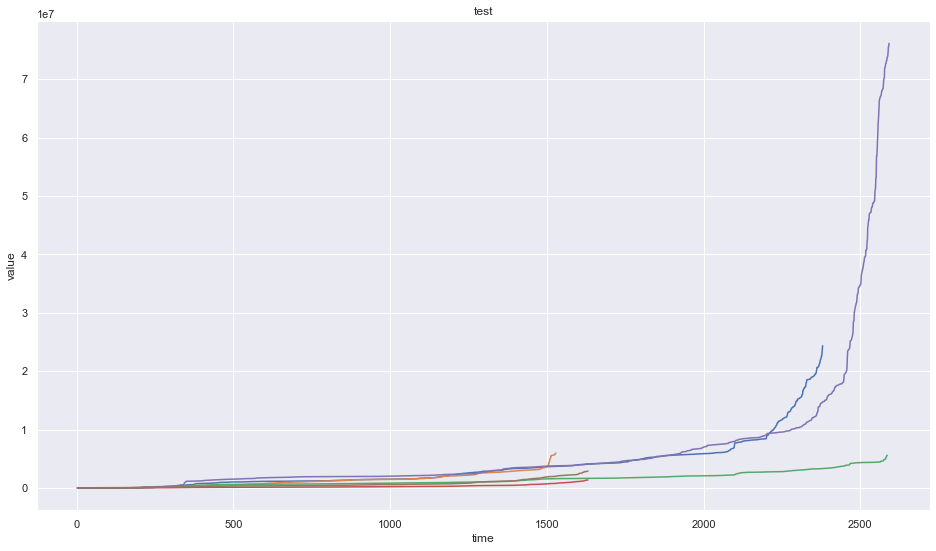

In [4]:
plt.figure(figsize=(16,9))
plt.title("test")
plt.ylabel("value")
plt.xlabel("time")
n = 0
for c in (A1,A2,B1,B2,C1,C2):
    n += 0.1
    plt.plot(c)
plt.show()

In [5]:
def check_len(a,b):
    if len(a) != len(b):
        return False
    return True

In [6]:
sum(check_len(iter_[0],iter_[1]) for iter_ in ((A1,A2),(B1,B2),(C1,C2)))

3

In [7]:
import pandas as pd
import os
df = pd.read_excel("一晓网络自动回归建模推理机(指数对应数据).xlsx")
df

,一级类目id,统计日期,日期类型,平台,终端,访客指数\nuvHits,收藏次数指数\ncltHot,加购次数指数\ncartHot,加购人数指数\ncartHits,浏览量指数\npvHot,...,访客数\nuv,收藏次数\ncltTimes,加购次数\ncartTimes,加购人数\ncartByrCnt,浏览量\npv,收藏人数\ncltByrCnt,搜索人数\n,搜索次数\n,买家数\n,交易金额\n
0,50020579,2020-02-01,month,TM,All,5471,13,59,428,7478,...,3939,121,434,370,10088,102,1702.0,986.0,134.0,34495.0
1,50020579,2020-07-01,month,TM,All,5610,8,86,615,7622,...,4205,72,542,446,10931,65,2104.0,1134.0,265.0,63632.0
2,50020579,2020-08-01,month,TM,All,5840,11,163,828,8504,...,4679,102,709,566,12367,88,2516.0,1364.0,289.0,74827.0
3,50020579,2020-01-01,month,TM,All,5984,10,115,701,7824,...,4745,90,619,509,11848,80,1970.0,1145.0,202.0,45152.0
4,50020579,2020-04-01,month,TM,All,6578,11,163,876,10257,...,5569,102,709,589,13902,90,2501.0,1528.0,234.0,57164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,50020579,2019-12-01,month,All,All,1361136,391418,723947,592721,2870554,...,46869159,7217572,28709544,9689248,556140166,3607100,NaN,NaN,NaN,NaN
1626,50020579,2020-06-01,month,All,All,1368766,385218,728044,587916,2853912,...,48150166,6837318,29368999,9636505,540067721,3609798,NaN,NaN,NaN,NaN
1627,50020579,2020-05-01,month,All,All,1369191,390794,720186,584143,2864155,...,48338649,7114983,27843791,9558788,551940386,3686052,NaN,NaN,NaN,NaN
1628,50020579,2020-08-01,month,All,All,1370125,387451,714811,549250,2828228,...,48805635,6929017,26072045,9145802,515510096,3729158,NaN,NaN,NaN,NaN


In [8]:
df.columns

Index(['一级类目id', '统计日期', '日期类型', '平台', '终端', '访客指数\nuvHits', '收藏次数指数\ncltHot',
       '加购次数指数\ncartHot', '加购人数指数\ncartHits', '浏览量指数\npvHot',
       '收藏人数指数\ncltHits', '搜索人数指数\nsePvIndex', '搜索次数指数\nseIpvUvHits',
       '买家数指数\npayByrCntIndex', '交易指数\ntradeIndex', '访客数\nuv',
       '收藏次数\ncltTimes', '加购次数\ncartTimes', '加购人数\ncartByrCnt', '浏览量\npv',
       '收藏人数\ncltByrCnt', '搜索人数\n', '搜索次数\n', '买家数\n', '交易金额\n'],
      dtype='object')

In [9]:
data_X = df[['访客指数\nuvHits','收藏次数指数\ncltHot','加购次数指数\ncartHot','加购人数指数\ncartHits','浏览量指数\npvHot']]#'收藏人数指数\ncltHits','搜索人数指数\nsePvIndex','搜索次数指数\nseIpvUvHits','买家数指数\npayByrCntIndex','交易指数\ntradeIndex']]
data_X.head()

,访客指数\nuvHits,收藏次数指数\ncltHot,加购次数指数\ncartHot,加购人数指数\ncartHits,浏览量指数\npvHot
0,5471,13,59,428,7478
1,5610,8,86,615,7622
2,5840,11,163,828,8504
3,5984,10,115,701,7824
4,6578,11,163,876,10257


访客指数
uvHits


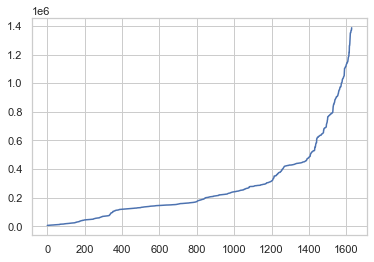

收藏次数指数
cltHot


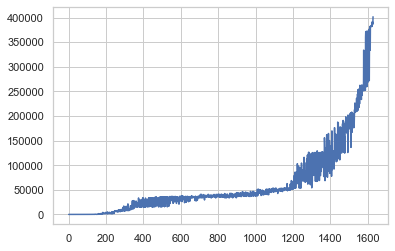

加购次数指数
cartHot


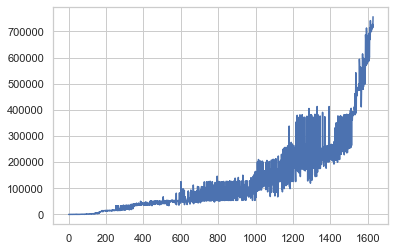

加购人数指数
cartHits


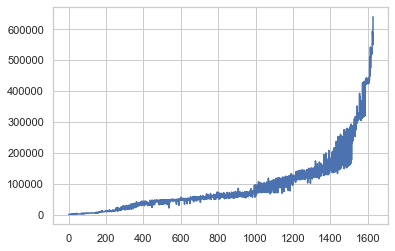

浏览量指数
pvHot


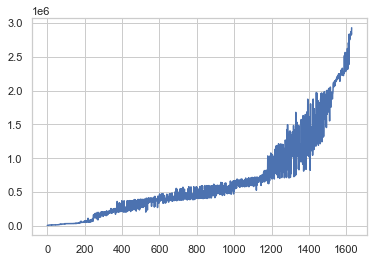

In [25]:

for c in data_X:
    print(c)
    plt.plot(data_X[c])
    plt.show()

/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 35775 (\N{CJK UNIFIED IDEOGRAPH-8BBF}) missing from current font.
  fig.canvas.draw()
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from current font.
  fig.canvas.draw()
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.draw()
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.draw()
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/seaborn/utils.py:95: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.draw()
/home/zhangmanman/anacond

<AxesSubplot:>

/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35775 (\N{CJK UNIFIED IDEOGRAPH-8BBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23458 (\N{CJK UNIFIED IDEOGRAPH-5BA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/home/zhangmanman/anaconda3/envs/kiteENV/lib/python3.8/site-packages/IPython/core/pylabt

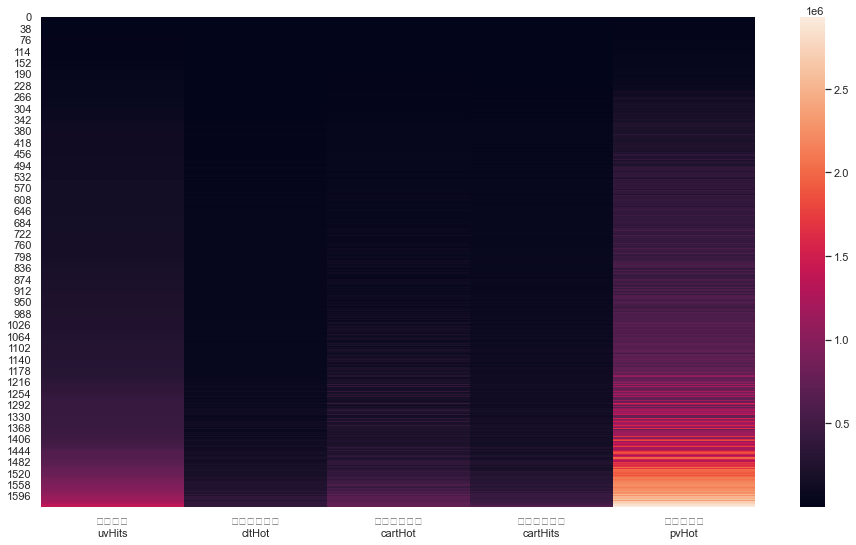

In [11]:
%matplotlib inline
# 调用魔法方法 使得每次显示结果时不用调用plt.show()方法
sns.set(style='whitegrid', color_codes=True)
# 设置默认风格 
np.random.seed(sum(map(ord, 'categorical')))
plt.figure(figsize=(16,9))
sns.heatmap(data_X)

In [12]:
# 数据预先处理

<AxesSubplot:>

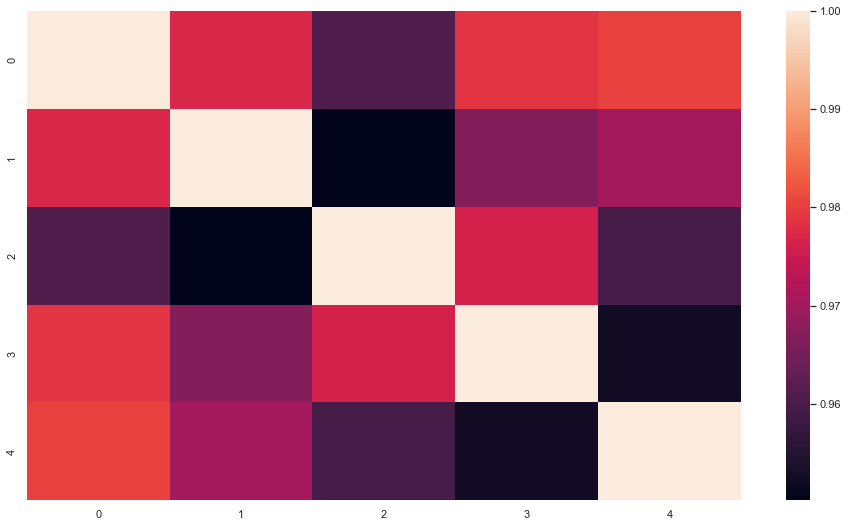

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(np.corrcoef(data_X.T))

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


def generateX(column_names):
    data_X = df[column_names]
    return data_X.to_numpy()


def generateY(column_name):
    data_Y = df[column_name]
    data_Y = data_Y.apply(lambda x : 0 if pd.isna(x)==True else x)
    return data_Y.to_numpy()

def lr(trainX,trainY,TestX):
    log_reg1=LogisticRegression(multi_class="multinomial",solver='newton-cg',max_iter=100,class_weight="balanced",n_jobs=64)
    log_reg1.fit(trainX,trainY)
    return {"预期":log_reg1.predict(TestX),"截距":log_reg1.intercept_,"线性模型的系数":log_reg1.coef_}


# 选择并打散数据

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

X_name = ['访客指数\nuvHits','收藏次数指数\ncltHot','加购次数指数\ncartHot','加购人数指数\ncartHits','浏览量指数\npvHot']#,'收藏人数指数\ncltHits','搜索人数指数\nsePvIndex','搜索次数指数\nseIpvUvHits','买家数指数\npayByrCntIndex','交易指数\ntradeIndex']
init_X = generateX(X_name)
init_Y = generateY('交易金额\n')


scaler = StandardScaler()                           #实例化
scaler.fit(init_X)                                    #fit，本质是生成均值和方差
 
scaler.mean_                                        #查看均值的属性mean_
scaler.var_                                         #查看方差的属性var_
 
x_std = scaler.transform(init_X)                      #通过接口导出结果
 
x_std.mean()                                        #导出的结果是一个数组，用mean()查看均值
x_std.std()                                         #用std()查看方差
 
init_X = scaler.fit_transform(init_X)                          #使用fit_transform(data)一步达成结果
 
scaler.inverse_transform(x_std)                     #使用inverse_transform逆转标准




for i in range(1000):
    data = np.c_[init_X,init_Y]
    np.random.shuffle(data)
srcX,srcY = data[:,:-1],data[:,-1]
srcX


array([[ 0.11820236, -0.14898821,  0.37592124,  0.22785593,  0.10953412],
       [-0.47379231, -0.37501526, -0.50815796, -0.40383198, -0.45600253],
       [-0.46126504, -0.36113889, -0.49184421, -0.35857905, -0.44569197],
       ...,
       [-0.57374995, -0.47158346, -0.63692531, -0.56562656, -0.67293641],
       [-0.53396323, -0.60204021, -0.58713956, -0.55474333, -0.58254983],
       [-0.15705778, -0.23163959,  0.03965962, -0.07661848, -0.10875953]])

In [16]:
Y = np.c_[srcY,srcY]

train_X,test_x,train_Y,test_y = train_test_split(srcX[:1000],srcY[:1000],test_size=0.3, random_state=4)
train_X.shape,test_x.shape,train_Y.shape,test_y.shape

((700, 5), (300, 5), (700,), (300,))

In [17]:
# mvm多分类逻辑回归

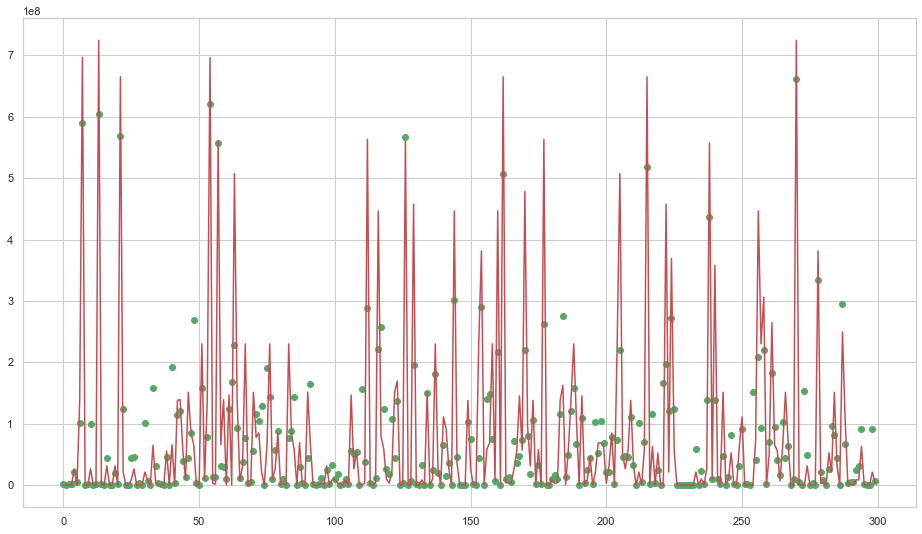

In [18]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


def generateX(column_names):
    data_X = df[column_names]
    return data_X.to_numpy()


def generateY(column_name):
    data_Y = df[column_name]
    data_Y = data_Y.apply(lambda x : 0 if pd.isna(x)==True else x)
    return data_Y.to_numpy()

def lr(trainX,trainY,TestX):
    log_reg1=LogisticRegression(multi_class="multinomial",solver='newton-cg',max_iter=100,class_weight="balanced",n_jobs=64)
    log_reg1.fit(trainX,trainY)
    return {"预期":log_reg1.predict(TestX),"截距":log_reg1.intercept_,"线性模型的系数":log_reg1.coef_}



predict = lr(train_X,train_Y,test_x)
plt.figure(figsize=(16,9))
plt.plot(predict['预期'],c='r')
plt.scatter(range(len(test_y)),test_y,c='g')

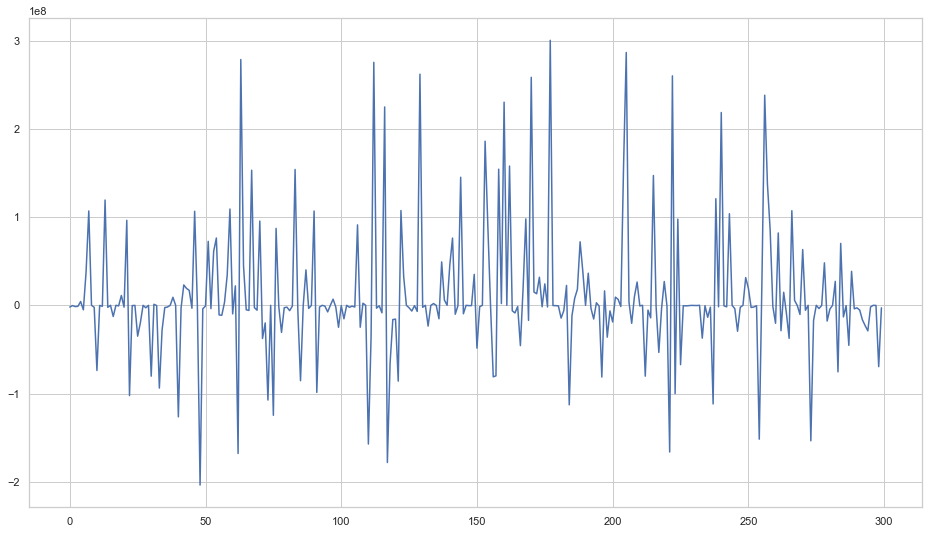

In [19]:
plt.figure(figsize=(16,9))
plt.plot(predict['预期']-test_y)

In [20]:
lstd = np.std(predict['预期']-test_y)
lstd

72619137.3023295

# 标准分数，样本方差，样本标准差

In [21]:
def Z_score(x):
    return (x-x.mean())/np.var(x)

def sample_var(x,dfc=True):
    n = x.size
    ones_vector = np.ones(n)
    mu = x.dot(ones_vector)/n
    return ((x-mu)**2).dot(ones_vector)/(n-dfc)

def sample_std(x,dfc=True):
    return np.sqrt(sample_var(x,dfc=dfc))



In [22]:
def residual(y,yi):
    return y - yi

def total_sum_of_squares(y,yi):
    n = y.size
    return (residual(y,yi)**2).dot(np.ones(n))

total_sum_of_squares(predict['预期'],test_y)

1.6152535444106941e+18

In [23]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost  as xgb
import  pandas  as  pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
 
#获取数据
train_X,test_x,train_Y,test_y = train_test_split(srcX[:1000],Y[:1000],test_size=0.3, random_state=4)
train_X.shape,test_x.shape,train_Y.shape,test_y.shape

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
import xgboost  as xgb
import  pandas  as  pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
#准备参数
other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
multioutputregressor =MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',**other_params)).fit(train_X, train_Y)
check=multioutputregressor.predict(test_x)
print(check.shape,check[:,0].shape)



plt.figure(figsize=(16,9))
plt.scatter(range(check[:,1].size),check[:,1],c='y')
plt.scatter(range(len(test_y)),test_y[:,1],c='g')
plt.plot(test_y[:,1]-check[:,1],c='r')
plt.title("XGBRegressor")

In [ ]:
xstd =np.std(check[:,1]-test_y[:,0])
xstd,lstd

In [ ]:
sample_var(check[:,1]),sample_std(check[:,1]-test_y[:,0])

plt.figure(figsize=(16,9))
plt.plot(Z_score(predict['预期']-test_y[:,0])),np.var(Z_score(predict['预期']-test_y[:,0]))

In [ ]:
plt.figure(figsize=(16,9))
std = np.sqrt(((check[:,1]-test_y[:,0])**2).sum()/(len(test_y)-1))
std

# 线性模型

In [ ]:
train_x,test_X,train_y,test_Y = train_X,test_x,train_Y[:,0],test_y[:,0]
print(train_x.shape,test_X.shape,train_y.shape,test_Y.shape)

from sklearn import linear_model
sk_regr = linear_model.LinearRegression(n_jobs=64)
sk_regr.fit(train_x,train_y)
predict_ = sk_regr.predict(test_X)


plt.figure(figsize=(16,9))
plt.scatter(range(predict_.size),predict_,c='g')
plt.scatter(range(test_Y.size),test_Y,c='y')
plt.plot(predict_-test_Y,c='r')

In [ ]:
plt.plot(predict_-test_Y)

In [ ]:
sample_std(predict_-test_Y),lstd,xstd

# 归回神经网络

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt


class RegressionNeuralNetwork(torch.nn.Module): # torch.nn.Module net的主模块
    def __init__(self,n_features,n_hidden,n_output):
        '''
        n_features 数据个数
        n_hidden 隐藏层的神经元的个数
        n_output
        '''
        super(RegressionNeuralNetwork,self).__init__() #要继承模块的信息
        self.hidden = torch.nn.Linear(n_features,n_hidden) # 隐藏层，输入的内容是他有多少哥输入和输出
        self.predict = torch.nn.Linear(n_hidden,n_output) # 输出预测层，输入的内容是

    def forward(self,x):
        '''前向传播'''
        x = F.relu(self.hidden(x)) #过一遍hidden传入上面定义的线性神经网络处理的函数中
        x = self.predict(x)
        return x
    

    
    
    
train_X_tensor = torch.FloatTensor(train_x)#[:,2][:,None]    
#print(train_X_tensor)
train_Y_tensor = torch.FloatTensor(train_y)
test_X_tensor = torch.FloatTensor(test_X)
test_Y_tensor = torch.FloatTensor(test_Y)
net = RegressionNeuralNetwork(5,1,1)


'''
optimizer 设置优化器
lr是学习率 这里设置为0.005
'''
optimizer = torch.optim.SGD(net.parameters(),lr=0.1)
'''
设置损失函数
MSELoss 平方误差和做回归的损失函数比较合适
'''
loss_func = torch.nn.MSELoss()
'''训练神经网络10000次'''
for t in range(100):
    '''调用图神经网络预测，输入x'''
    prediction = net(train_X_tensor) 
    '''计算y值的误差,传入预测值和y的实际值'''
    loss = loss_func(prediction,train_Y_tensor)
    '''梯度下降的终点设置为0'''
    optimizer.zero_grad() #
    if t % 10==0:
        print(t,loss,)
    '''设置反向传播'''
    loss.backward() #
    ''''''
    optimizer.step()
    
plt.figure(figsize=(16,9))    
plt.plot(prediction.data.numpy(),c='r')
plt.scatter(range(test_Y_tensor.shape[0]),test_Y_tensor.numpy(),c='g')

In [ ]:

from itertools import combinations,permutations

XY= dict()

def correlation(x, y):
    return (((x-x.mean())/(x.std(ddof=0)))*((y-y.mean())/(y.std(ddof=0)))).mean() 

#设置相关系数强度
temp = dict()
argmin_pearson = 0.7
columns = ['访客指数\nuvHits', '收藏次数指数\ncltHot',
       '加购次数指数\ncartHot', '加购人数指数\ncartHits', '浏览量指数\npvHot',
       '收藏人数指数\ncltHits', '搜索人数指数\nsePvIndex', '搜索次数指数\nseIpvUvHits',
       '买家数指数\npayByrCntIndex', '交易指数\ntradeIndex', '访客数\nuv',
       '收藏次数\ncltTimes', '加购次数\ncartTimes', '加购人数\ncartByrCnt', '浏览量\npv',
       '收藏人数\ncltByrCnt', '搜索人数\n', '搜索次数\n', '买家数\n', '交易金额\n']
for comb in combinations(columns,2):
    #print(comb)
    #print(df[comb[0]].to_numpy())
    pearson =correlation(df[comb[0]].to_numpy().astype(float),df[comb[1]].to_numpy().astype(float))
    if pearson >= argmin_pearson:
        a,b = comb[0],comb[1]
        if a in temp:
            temp[a].append([b,pearson])
        else:
            temp.update({a:[[b,pearson]]})

                    
for comb,vars_ in temp.items():
    data = np.array(vars_)
    temp_sorted = comb,data[np.argsort(data[:,1].astype(float))]
    Y,Xi,Xscore = temp_sorted[0],temp_sorted[1][:,0],temp_sorted[1][:,1]
    
    XY.update({Y:[Xi,Xscore.astype(float)]})
XY

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import os
df = pd.read_excel("一晓网络自动回归建模推理机(指数对应数据).xlsx")
df

Xp = df[['加购次数\ncartTimes', '浏览量\npv', '收藏次数\ncltTimes', '加购人数\ncartByrCnt','收藏人数\ncltByrCnt', '访客数\nuv']]
Yp = df['访客指数\nuvHits']


scaler = StandardScaler()                           #实例化
scaler.fit(Xp)                                    #fit，本质是生成均值和方差
 
scaler.mean_                                        #查看均值的属性mean_
scaler.var_                                         #查看方差的属性var_
 
x_std = scaler.transform(Xp)                      #通过接口导出结果
 
x_std.mean()                                        #导出的结果是一个数组，用mean()查看均值
x_std.std()                                         #用std()查看方差
 
init_X = scaler.fit_transform(Xp)                          #使用fit_transform(data)一步达成结果
 
scaler.inverse_transform(x_std)                     #使用inverse_transform逆转标准




for i in range(1000):
    data = np.c_[Xp,Yp]
    np.random.shuffle(data)
srcX,srcY = data[:,:-1],data[:,-1]


from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
 
#划分测试和验证集
train_X,test_x,train_Y,test_y = train_test_split(srcX,srcY,test_size=0.3, random_state=4)

def testliner_model(train_X,test_x,train_Y,test_y,return_keyword=False):
    sk_regr = linear_model.LinearRegression(n_jobs=64)
    sk_regr.fit(train_x,train_y)
    predict_ = sk_regr.predict(test_X)

    plt.figure(figsize=(16,9))
    plt.scatter(range(predict_.size),predict_,c='g')
    plt.scatter(range(test_Y.size),test_Y,c='y')
    plt.plot(predict_-test_Y,c='r')
    plt.title("liner_model")
    plt.show()
    plt.close()
    if return_keyword:
        return predict_,test_y
    
    
    
    

from sklearn.multioutput import MultiOutputRegressor
import xgboost  as xgb
import  pandas  as  pd
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

def XGBRegressor_model(train_X,test_x,init_train_Y,init_test_y,return_keyword=False):
    train_Y,test_y = [init_train_Y,init_train_Y],[init_test_y,init_test_y]
    #准备参数
    other_params = {'learning_rate': 0.1, 'n_estimators': 300, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0, 'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
    multioutputregressor =MultiOutputRegressor(xgb.XGBRegressor(objective='reg:squarederror',**other_params)).fit(train_X, train_Y)
    check=multioutputregressor.predict(test_x)
    print(check.shape,check[:,0].shape)



    plt.figure(figsize=(16,9))
    plt.scatter(range(check[:,1].size),check[:,1],c='y')
    plt.scatter(range(len(test_y)),test_y[:,1],c='g')
    plt.plot(test_y[:,1]-check[:,1],c='r')
    plt.title("XGBRegressor")

    
testliner_model(train_X,test_x,train_Y,test_y),XGBRegressor_model(train_X,test_x,train_Y,test_y)

In [ ]:

from itertools import combinations,permutations



#设置相关系数强度
temp = dict()
argmin_pearson = 0
for comb in combinations(['访客指数\nuvHits', '收藏次数指数\ncltHot',
       '加购次数指数\ncartHot', '加购人数指数\ncartHits', '浏览量指数\npvHot',
       '收藏人数指数\ncltHits', '搜索人数指数\nsePvIndex', '搜索次数指数\nseIpvUvHits',
       '买家数指数\npayByrCntIndex', '交易指数\ntradeIndex', '访客数\nuv',
       '收藏次数\ncltTimes', '加购次数\ncartTimes', '加购人数\ncartByrCnt', '浏览量\npv',
       '收藏人数\ncltByrCnt', '搜索人数\n', '搜索次数\n', '买家数\n', '交易金额\n'],2):
    pearson = np.cov(df[comb[0]].to_numpy(),df[comb[1]].to_numpy())[1,1]
    if pearson >= argmin_pearson:
        a,b = comb[0],comb[1]
        if a in temp:
            temp[a].append([b,pearson])
        else:
            temp.update({a:[[b,pearson]]})

                    
for comb,vars_ in temp.items():
    data = np.array(vars_)
    print(comb,data[np.argsort(data[:,1])])